<a href="https://colab.research.google.com/github/programeralebrije/MachineLearningNYtaxi/blob/main/new_york_taxi_fare_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('new-york-taxi-fare-predictions')
jovian.set_colab_id('102pCN3oVvDHoazudeUcVW7bzSg5LR3Zp')

# New York Taxi Fare Predictions 

In [4]:
!pip install jovian --upgrade --quiet

In [5]:
import jovian

In [6]:
# Execute this to save new versions of the notebook
jovian.commit(project="new-york-taxi-fare-predictions")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

### Outline of the project
1. Downlaod the dataset
2. Explore and analyze the dataset
3. Prepare the dataset for ML training 
4. Train Hardcoded and baseline models 
5. Make predictions and submit to Kaggle
6. Perform feature engeneering 
7. Train and evaluate different models 
8. Tune Hyperparameters for the best models 
9. Train on a GPU with the entire dataset 
10. Document and publish the project online 

# 1. Downlad the dataset 

Steps:
- Install required libraries
- Download data from Kaggle
- View dataset files 
- Load trianing set with Pandas
- Load test set with Pandas

# Install required libraries

In [7]:
!pip install jovian opendatasets pandas numpy scikit-learn xgboost --quiet

In [8]:
import jovian 

In [9]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

# Download data from Kaggle 

In [10]:
import opendatasets as od

In [11]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'

In [12]:
od.download(dataset_url)

Skipping, found downloaded files in "./new-york-city-taxi-fare-prediction" (use force=True to force download)


In [13]:
data_dir = './new-york-city-taxi-fare-prediction'

##View Dataset Files

In [14]:
# List of files with size
!ls -lh {data_dir}

total 6.0G
-rw-r--r-- 1 root root  486 Jan 27 18:10 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 1.6G Jan 27 18:10 new-york-city-taxi-fare-prediction.zip
-rw-r--r-- 1 root root 336K Jan 27 18:10 sample_submission.csv
-rw-r--r-- 1 root root 960K Jan 27 18:10 test.csv
-rw-r--r-- 1 root root 4.4G Jan 27 18:11 train.csv


In [15]:
!wc -1 {data_dir}/train.csv

wc: invalid option -- '1'
Try 'wc --help' for more information.


In [16]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [17]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

Test Data Set is missing Fare amout, this set is not be use for predictions .

In [18]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [19]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

45696971 ./new-york-city-taxi-fare-prediction/train.csv


In [20]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [21]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


**# No. of lines in training set**

In [ ]:
!wc -l {data_dir}/train.csv

**# No. of lines in submission file**

In [22]:
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


**# No. of lines in test set**

In [23]:
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


Observations:

* This is a supervised learning 
regression problem
* Training data is 5.5 GB in size
* Training data has 5.5 million rows
* Test set is much smaller (< 10,000 rows)
* The training set has 8 columns:
   * key (a unique identifier)
   * fare_amount (target column)
   * pickup_datetime
   * pickup_longitude
   * pickup_latitude
   * dropoff_longitude
   * dropoff_latitude
   * passenger_count
* The test set has all columns except the target column fare_amount.
* The submission file should contain the key and fare_amount for each test sample.

In [24]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

##  1.- Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

 * Ignore the key column
 * Parse pickup datetime while loading data
 * Specify data types for other columns
   * float32 for geo coordinates
   * float32 for fare amount
   * uint8 for passenger count
* Work with a 1% sample of the data (~500k rows)
We can apply these optimizations while using pd.read_csv

In [25]:
import pandas as pd
import random

In [26]:
sample_frac = 0.03

In [27]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

In [28]:
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [29]:
import random

In [30]:
random.random(
    
)

0.17512380472758715

In [ ]:

dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

CPU times: user 5min 19s, sys: 1.04 s, total: 5min 19s
Wall time: 5min 19s

In [35]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782004,1.0
1,8.9,2009-09-02 01:11:00+00:00,-73.980659,40.733871,-73.991539,40.758138,2.0
2,4.1,2009-11-06 01:04:03+00:00,-73.991600,40.744713,-73.983078,40.744682,2.0
3,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
4,10.0,2014-11-12 12:40:29+00:00,-74.002579,40.739571,-73.994583,40.760682,1.0
...,...,...,...,...,...,...,...
1369659,5.3,2010-01-10 08:52:27+00:00,-73.992691,40.743156,-73.997177,40.729872,1.0
1369660,9.0,2013-10-23 08:30:10+00:00,-73.975174,40.761532,-73.986984,40.750659,1.0
1369661,4.9,2010-06-20 17:02:00+00:00,-73.971291,40.764355,-73.960228,40.781382,1.0
1369662,18.1,2010-03-31 21:06:00+00:00,-74.012726,40.702095,-73.955086,40.776762,1.0


In [123]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [37]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [38]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

## 2.- Explore the Dataset

* Basic info about training set
* Basic info about test set
* Exploratory data analysis & visualization
* Ask & answer questions

## Training Set


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369664 entries, 0 to 1369663
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fare_amount        1369664 non-null  float32
 1   pickup_datetime    1369664 non-null  object 
 2   pickup_longitude   1369663 non-null  float32
 3   pickup_latitude    1369663 non-null  float32
 4   dropoff_longitude  1369653 non-null  float32
 5   dropoff_latitude   1369653 non-null  float64
 6   passenger_count    1369663 non-null  float32
dtypes: float32(5), float64(1), object(1)
memory usage: 47.0+ MB


In [40]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.369664e+06,1.369663e+06,1.369663e+06,1.369653e+06,1.369653e+06,1.369663e+06
mean,1.134737e+01,-7.142214e+01,3.945183e+01,-7.142221e+01,3.992158e+01,1.685178e+00
std,9.852162e+00,1.312560e+01,1.085813e+01,1.334568e+01,1.095629e+01,1.338693e+00
min,-9.600000e+01,-3.439245e+03,-3.474112e+03,-3.367929e+03,-3.474112e+03,0.000000e+00
25%,6.000000e+00,-7.399203e+01,4.073491e+01,-7.399140e+01,4.073399e+01,1.000000e+00
50%,8.500000e+00,-7.398179e+01,4.075267e+01,-7.398017e+01,4.075313e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076714e+01,-7.396369e+01,4.076806e+01,2.000000e+00
max,1.097480e+03,3.442185e+03,3.347260e+03,3.442185e+03,3.351403e+03,2.080000e+02


In [42]:
df.pickup_datetime.min(), df.pickup_datetime.max()

TypeError: ignored

Observations about training data:

- 1,661,731 rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-300.0 to \$1097.0 
- `passenger_count` ranges from 0 to 208 
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~57 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.

# Test Set

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [44]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278756
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [45]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [46]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

### Exploratory Data Analysis and Visualization




### Ask & Answer Questions


1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?

EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

In [47]:
import seaborn as sns

In [48]:
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


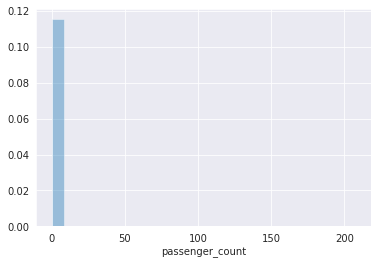

In [49]:
sns.distplot(df.passenger_count, bins=24, kde=False, norm_hist=True)

In [50]:
sample_df = df.sample(int(0.1 * len(df)))

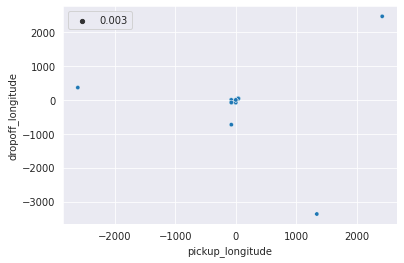

In [51]:
sns.scatterplot(x=sample_df.pickup_longitude, y=sample_df.dropoff_longitude, size=0.003)

In [52]:
import folium

In [53]:
lat_pick, lon_pick, lat_dro, lon_pick = df.pickup_latitude, df.pickup_longitude[0], df.dropoff_latitude[0], df.dropoff_longitude[0], 
lat_pick, lon_pick, lat_dro, lon_pick,

(0          40.711304
 1          40.733871
 2          40.744713
 3          40.751904
 4          40.739571
              ...    
 1369659    40.743156
 1369660    40.761532
 1369661    40.764355
 1369662    40.702095
 1369663          NaN
 Name: pickup_latitude, Length: 1369664, dtype: float32,
 -73.97927,
 40.782004,
 -73.97927)

In [54]:
for x in df[['pickup_longitude', 'dropoff_latitude', 'pickup_latitude', 'dropoff_longitude']].sample(100).iteritems():
    print(x[1])

879619    -73.970863
1053788   -74.001015
524536    -74.002701
114875    -73.979340
418669    -73.785828
             ...    
585109    -73.983368
920189    -73.984215
378908    -73.975159
511508    -73.975746
419004    -73.979576
Name: pickup_longitude, Length: 100, dtype: float32
879619     40.731265
1053788    40.736172
524536     40.774400
114875     40.775512
418669     40.763177
             ...    
585109     40.682305
920189     40.763505
378908     40.738302
511508     40.772228
419004     40.773038
Name: dropoff_latitude, Length: 100, dtype: float64
879619     40.751640
1053788    40.741802
524536     40.749882
114875     40.752983
418669     40.644066
             ...    
585109     40.726261
920189     40.747910
378908     40.746002
511508     40.789516
419004     40.759956
Name: pickup_latitude, Length: 100, dtype: float32
879619    -73.988380
1053788   -73.985809
524536    -73.957443
114875    -73.956345
418669    -73.989998
             ...    
585109    -73.996002
92018

In [55]:
zip(list(df.pickup_longitude), list(df.dropoff_latitude), list(df.pickup_latitude), list(df.dropoff_longitude))

In [56]:
from folium.plugins import HeatMap

In [57]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(df.pickup_longitude), list(df.dropoff_latitude), list(df.pickup_latitude), list(df.dropoff_longitude)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [59]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [63]:
len(train_df), len(val_df)

(1095731, 273933)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [64]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [65]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [66]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [67]:
target_col = 'fare_amount'

#### Training

In [68]:
train_inputs = train_df[input_cols]


In [69]:
train_targets = train_df[target_col]

In [70]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
759570,-73.982315,40.778034,-73.978645,40.787427,5.0
981689,-73.979919,40.743427,-73.969910,40.757090,1.0
401856,-73.978485,40.753517,-73.987724,40.747419,1.0
1126507,-73.980347,40.730492,-74.010452,40.701980,1.0
50708,-73.776703,40.645275,-73.973495,40.748177,1.0
...,...,...,...,...,...
110268,-73.965469,40.759113,-73.979965,40.748959,1.0
259178,-73.962624,40.763153,-73.973259,40.750961,1.0
131932,-73.983635,40.738041,-73.969292,40.768489,3.0
671155,-73.966866,40.756706,-73.980789,40.749471,1.0


In [71]:
train_targets

759570      4.100000
981689      5.700000
401856      4.500000
1126507    10.900000
50708      57.540001
             ...    
110268      6.500000
259178      6.500000
131932      7.700000
671155      8.500000
121958      9.500000
Name: fare_amount, Length: 1095722, dtype: float32

#### Validation

In [72]:
val_inputs = val_df[input_cols]

In [73]:
val_targets = val_df[target_col]

In [74]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1213099,-74.000664,40.730980,-73.977982,40.735403,3.0
394128,-73.969940,40.755657,-73.964943,40.757158,5.0
623381,-73.957756,40.785275,-73.948166,40.779883,1.0
172228,-73.988525,40.746277,-73.987633,40.750502,1.0
917407,-73.992607,40.746876,-73.963890,40.774032,1.0
...,...,...,...,...,...
627677,-74.010994,40.748741,-73.965149,40.764700,1.0
1019223,-73.999962,40.727158,-73.967728,40.771423,2.0
65188,-74.014587,40.709679,-73.977303,40.758000,3.0
199800,-73.976631,40.780441,-73.983070,40.778369,1.0


In [75]:
val_targets

1213099     8.5
394128      3.3
623381      5.0
172228      4.0
917407     11.0
           ... 
627677      9.3
1019223    17.5
65188      24.5
199800      4.0
1748        8.0
Name: fare_amount, Length: 273931, dtype: float32

### Test

In [76]:
test_input = test_df[input_cols]

In [77]:
test_input

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [78]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

## 4. Train Hardcoded and Baseline Models 
 
- Hardcoded model : always predict and average fare
- Baseline model: linear regression 


### Train and evaluate hardcoded model 

Lets create a simple model that always predicts the average.

In [79]:
import numpy as np


In [80]:
class MeanRegressor: 
  def fit(self, inputs, targets): 
    self.mean = targets.mean()

  def predict(self, inputs):
    return np.full(inputs.shape[0], self.mean)

In [81]:
mean_model = MeanRegressor()

In [82]:
mean_model.fit(train_inputs, train_targets)

In [83]:
mean_model.mean

11.353604316711426

In [84]:
train_preds= mean_model.predict(train_inputs)

In [85]:
train_preds

array([11.35360432, 11.35360432, 11.35360432, ..., 11.35360432,
       11.35360432, 11.35360432])

In [86]:
train_targets

759570      4.100000
981689      5.700000
401856      4.500000
1126507    10.900000
50708      57.540001
             ...    
110268      6.500000
259178      6.500000
131932      7.700000
671155      8.500000
121958      9.500000
Name: fare_amount, Length: 1095722, dtype: float32

In [87]:
val_preds = mean_model.predict(val_inputs)

In [88]:
val_preds

array([11.35360432, 11.35360432, 11.35360432, ..., 11.35360432,
       11.35360432, 11.35360432])

In [89]:
val_targets

1213099     8.5
394128      3.3
623381      5.0
172228      4.0
917407     11.0
           ... 
627677      9.3
1019223    17.5
65188      24.5
199800      4.0
1748        8.0
Name: fare_amount, Length: 273931, dtype: float32

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
def rmse(targets, preds):
  return mean_squared_error(targets, preds, squared=False )

In [92]:
train_rmse= rmse(train_targets, train_preds)
train_rmse

9.884464735519511

In [93]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

9.747432896336582

### Our dump hard-coded model is off by $9.809 on average which is pretty bad, considering the average fare is 11.35

In [94]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

### Train and evaluate a basline model

we'll train a linear regression model as our baseline, which tries to express the target a weighted sum of the inputs 

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
linear_model = LinearRegression()

In [97]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [98]:
train_preds = linear_model.predict(train_inputs)

In [99]:
train_preds

array([11.64474712, 11.28569645, 11.28552831, ..., 11.46536546,
       11.28553956, 11.28553814])

In [100]:
train_targets

759570      4.100000
981689      5.700000
401856      4.500000
1126507    10.900000
50708      57.540001
             ...    
110268      6.500000
259178      6.500000
131932      7.700000
671155      8.500000
121958      9.500000
Name: fare_amount, Length: 1095722, dtype: float32

In [101]:
rmse(train_targets, train_preds)

9.88324387830637

In [102]:
val_preds = linear_model.predict(val_inputs)

In [103]:
rmse(val_targets, val_preds)

9.746438106581884



The linear regression model is off by $ 9.870, which isn't much better than simply predicting the average.
This is mainly because the training data (geocoordinates) is not in a format that is useful for the model, and we are not using one of the most columns: pickup date & time. 
However, now we have a baseline that our other models should ideally beat.

In [104]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

# Make predictions and submit to Kaggle 

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle 
- Record in experiment tracking sheet

In [105]:
test_input

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [106]:
test_preds = linear_model.predict(test_input)

In [107]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [108]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [109]:
sub_df['fare_ammount'] = test_preds

In [110]:
sub_df

,key,fare_amount,fare_ammount
0,2015-01-27 13:08:24.0000002,11.35,11.285518
1,2015-01-27 13:08:24.0000003,11.35,11.285624
2,2011-10-08 11:53:44.0000002,11.35,11.285603
3,2012-12-01 21:12:12.0000002,11.35,11.285448
4,2012-12-01 21:12:12.0000003,11.35,11.285337
...,...,...,...
9909,2015-05-10 12:37:51.0000002,11.35,11.734618
9910,2015-01-12 17:05:51.0000001,11.35,11.734516
9911,2015-04-19 20:44:15.0000001,11.35,11.736201
9912,2015-01-31 01:05:19.0000005,11.35,11.735034


In [111]:
sub_df.to_csv('linear_model_submission.csv', index=None)

In [112]:
def predict_and_submit(model, test_inputs, fname): 
  test_preds = model.predict(test_input)
  sub_df = pd.read_csv(data_dir+'sample_submission.csv')
  sub_df['fare_ammount'] = test_preds
  sub_df.csv(fname, index= None)
  return sub_df

## 6. Feature Engineering 

- Extract parts of the date
- Remove outliers and invalid data
- Add distance between pickup and drop 
- Add distance from landmarks

## Extract parts of date
- Year
- Month
- Day
- Weekday
- Hour

In [126]:
def add_dateparts(df, col):
  df[col + '_year'] = df[col].dt.year
  df[col + '_month'] = df[col].dt.month
  df[col + '_day'] = df[col].dt.day 
  df[col + '_weekday'] = df[col].dt.weekday 
  df[col + '_hour'] = df[col].dt.hour

In [122]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [121]:
col = 'pickup_datetime'


In [127]:
add_dateparts(test_df, 'pickup_datetime')

In [128]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1213099,8.5,2013-06-18 21:21:37+00:00,-74.000664,40.730980,-73.977982,40.735403,3.0
394128,3.3,2009-03-09 21:38:00+00:00,-73.969940,40.755657,-73.964943,40.757158,5.0
623381,5.0,2014-12-09 09:46:02+00:00,-73.957756,40.785275,-73.948166,40.779883,1.0
172228,4.0,2014-10-07 15:22:00+00:00,-73.988525,40.746277,-73.987633,40.750502,1.0
917407,11.0,2013-01-26 10:43:57+00:00,-73.992607,40.746876,-73.963890,40.774032,1.0
...,...,...,...,...,...,...,...
627677,9.3,2010-06-16 16:31:00+00:00,-74.010994,40.748741,-73.965149,40.764700,1.0
1019223,17.5,2013-03-06 11:59:00+00:00,-73.999962,40.727158,-73.967728,40.771423,2.0
65188,24.5,2013-09-04 14:33:20+00:00,-74.014587,40.709679,-73.977303,40.758000,3.0
199800,4.0,2014-08-28 12:56:22+00:00,-73.976631,40.780441,-73.983070,40.778369,1.0


In [129]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions


'https://jovian.ai/larrazolovictoria/new-york-taxi-fare-predictions'

## Add distance between pickup and drop

In [168]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):

  lon1, lat1, lon2, lat2 = (np.radians, [lon1, lat1, lon2, lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

  c = 2 * np.arcsin(np.sqrt(a))
  km = 6367 * c
  return km

In [169]:
def add_trip_distance(df): 
  df['trip_distance'] = haversine_np(df['pickup_longitude'], 
                                     df['pickup_latitude'],
                                     df['dropoff_longitude'],
                                     df['dropoff_latitude'])
                                     
                                     

In [166]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], 
                                       df['pickup_latitude'], 
                                       df['dropoff_longitude'], 
                                       df['dropoff_latitude'])

In [ ]:
add_trip_distance(train_df)

In [ ]:
add_trip_distance(val_df)

In [ ]:
add_trip_distance(test_df)

## Add distance from popular landmarks

- JFK Ariport
- LGA Airport
- EWR Airport 
- Times Square
- Met Museum 
- World Trade Center 

## We'll add the distance from drop location.

In [180]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [185]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
  lon, lat = landmark_lonlat
  df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [186]:
def add_landmarks(a_df):
  landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(a_df, name, lonlat)

In [ ]:
add_landmarks(train_df)